# Digit Recognizer

Os arquivos de dados train.csv e test.csv contêm imagens em escala de cinza de dígitos desenhados à mão, de zero a nove.

Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuro. Esse valor de pixel é um inteiro entre 0 e 255, inclusive.

O conjunto de dados de treinamento, (train.csv), tem 785 colunas. A primeira coluna, chamada "label", é o dígito que foi desenhado pelo usuário. O restante das colunas contém os valores de pixel da imagem associada.

Cada coluna de pixel no conjunto de treinamento tem um nome como pixelx, onde x é um inteiro entre 0 e 783, inclusive. Para localizar esse pixel na imagem, suponha que tenhamos decomposto x como x = i * 28 + j, onde i e j são inteiros entre 0 e 27, inclusive. Em seguida, o pixelx está localizado na linha i e na coluna j de uma matriz 28 x 28 (indexação por zero).

Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha a partir do topo, como no diagrama ascii abaixo.

Visualmente, se omitirmos o prefixo "pixel", os pixels comporão a imagem da seguinte forma:

    000 001 002 003 ... 026 027
    028 029 030 031 ... 054 055
    056 057 058 059 ... 082 083
     |   |   |   |  ...  |   |
    728 729 730 731 ... 754 755
    756 757 758 759 ... 782 783 

O conjunto de dados de teste, (test.csv), é o mesmo que o conjunto de treinamento, exceto que ele não contém a coluna "label".

Ele sera utilizada para a medição da acuracia pelo kaggle. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
df_train = pd.read_csv('train.csv');

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analise dos dados
Analizando os dados para tomar uma descisao de como processalos.

In [4]:
df_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df_train.isna().sum().sum()

0

In [6]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
df_train['label'].count()

42000

In [8]:
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

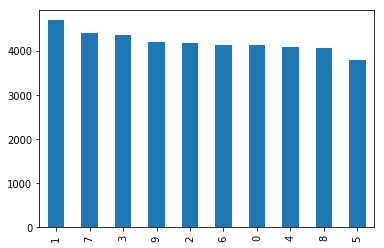

In [9]:
df_train['label'].value_counts().plot(kind='bar');

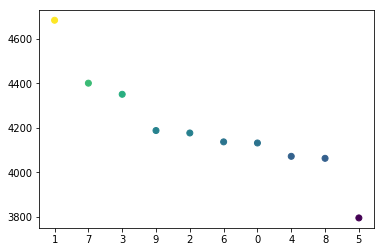

In [10]:
plt.scatter(['1','7','3','9','2','6','0','4','8','5'],df_train['label'].value_counts(),c=df_train['label'].value_counts());

### Extraindo features e labels

In [11]:
X = df_train.values[:,1:]
y = df_train.values[:,0]

In [12]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### obtendo valores para teste e treino

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y);

#### Standartizando

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
stand = StandardScaler()

Convertendo featura de test e treino para *float64*  antes de standartzar

In [16]:
X_train_std = stand.fit_transform(np.float64(X_train));
X_test_std = stand.transform(np.float64(X_test));

## Criando modelos

##### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

### Calculando predição

In [18]:
modelKNN_skl = KNeighborsClassifier(n_neighbors=3, metric='euclidean',algorithm='kd_tree')
modelKNN_skl.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
y_pred = modelKNN_skl.predict(X_test_std)

## Metricas

In [20]:
from sklearn import metrics

In [21]:
print('accuracy ',metrics.accuracy_score(y_test,y_pred))
print('precision',metrics.precision_score(y_test,y_pred,average='weighted'))

accuracy  0.9379761904761905
precision 0.9385989582663106


#### Criando e treinando modelo para geracao de um csv com os valores predito (para submicao no kaggle) 

In [22]:
import csv

In [23]:
df_test = pd.read_csv('test.csv')

In [24]:
stand = StandardScaler()

In [39]:
X_test = df_test.values

In [26]:
rs = np.random.RandomState(42)
shuffled_indices = rs.permutation(X.shape[0])

In [27]:
X = X[shuffled_indices]
y = y[shuffled_indices]

In [28]:
X_f_std = stand.fit_transform(np.float64(X))

In [29]:
rs = np.random.RandomState(42)
shuffled_indices = rs.permutation(X_test.shape[0])

In [30]:
X_test = X_test[shuffled_indices]

In [40]:
X_test_f = stand.fit_transform(np.float64(X_test))

In [41]:
modelKNN_skl = KNeighborsClassifier(n_neighbors=3, metric='euclidean',algorithm='kd_tree')
modelKNN_skl.fit(X_f_std,y)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
y_pred = modelKNN_skl.predict(X_test_f)

Gerando CSV

In [35]:
r = open("resposta.csv", "w")
c = csv.writer(r)

In [36]:
c.writerow(['ImageId','Label'])
for i in range(0, y_pred.shape[0]):
    c.writerow([i+1, y_pred[i]])
r.close()

In [37]:
res = pd.read_csv('resposta.csv')

In [38]:
res.head()

,ImageId,Label
0,1,4
1,2,6
2,3,4
3,4,0
4,5,4


CSV submetido ao Kaglle obteve um score de 0.94171

![resultado-kaglle](resultado-kagllee.png)